In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [39]:
df_new = pd.read_csv('dt_tbl1.csv', skiprows=1)

# The second row (now first row after skipping) becomes the header automatically
# Drop the now-redundant header row if it’s still inside the data
if df_new.columns[0] == '1':
    df_new = df_new[1:].reset_index(drop=True)


In [40]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 46 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   b            2126 non-null   float64
 1   e            2126 non-null   float64
 2   AC           2126 non-null   float64
 3   FM           2127 non-null   float64
 4   UC           2127 non-null   float64
 5   DL           2128 non-null   float64
 6   DS           2128 non-null   float64
 7   DP           2128 non-null   float64
 8   DR           2128 non-null   float64
 9   Unnamed: 9   0 non-null      float64
 10  LB           2126 non-null   float64
 11  AC.1         2126 non-null   float64
 12  FM.1         2127 non-null   float64
 13  UC.1         2127 non-null   float64
 14  DL.1         2128 non-null   float64
 15  DS.1         2128 non-null   float64
 16  DP.1         2128 non-null   float64
 17  ASTV         2127 non-null   float64
 18  MSTV         2127 non-null   float64
 19  ALTV  

In [41]:
# Drop all columns whose names start with 'Unnamed'
df_new = df_new.loc[:, ~df_new.columns.str.contains('^Unnamed')]

#  reset index after cleaning
df_new = df_new.reset_index(drop=True)

In [42]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 42 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   b         2126 non-null   float64
 1   e         2126 non-null   float64
 2   AC        2126 non-null   float64
 3   FM        2127 non-null   float64
 4   UC        2127 non-null   float64
 5   DL        2128 non-null   float64
 6   DS        2128 non-null   float64
 7   DP        2128 non-null   float64
 8   DR        2128 non-null   float64
 9   LB        2126 non-null   float64
 10  AC.1      2126 non-null   float64
 11  FM.1      2127 non-null   float64
 12  UC.1      2127 non-null   float64
 13  DL.1      2128 non-null   float64
 14  DS.1      2128 non-null   float64
 15  DP.1      2128 non-null   float64
 16  ASTV      2127 non-null   float64
 17  MSTV      2127 non-null   float64
 18  ALTV      2127 non-null   float64
 19  MLTV      2127 non-null   float64
 20  Width     2126 non-null   floa

In [43]:
#selecting only the necessary parameters
df_new = df_new.drop(df_new.columns[list(range(0, 9)) + list(range(30, 40))], axis=1)


In [44]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC.1      2126 non-null   float64
 2   FM.1      2127 non-null   float64
 3   UC.1      2127 non-null   float64
 4   DL.1      2128 non-null   float64
 5   DS.1      2128 non-null   float64
 6   DP.1      2128 non-null   float64
 7   ASTV      2127 non-null   float64
 8   MSTV      2127 non-null   float64
 9   ALTV      2127 non-null   float64
 10  MLTV      2127 non-null   float64
 11  Width     2126 non-null   float64
 12  Min       2126 non-null   float64
 13  Max       2126 non-null   float64
 14  Nmax      2126 non-null   float64
 15  Nzeros    2126 non-null   float64
 16  Mode      2126 non-null   float64
 17  Mean      2126 non-null   float64
 18  Median    2126 non-null   float64
 19  Variance  2126 non-null   float64
 20  Tendency  2126 non-null   floa

In [45]:
df_new.shape

(2129, 23)

In [46]:
df_new.head()

,LB,AC.1,FM.1,UC.1,DL.1,DS.1,DP.1,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0,1.0


In [47]:
df_new.describe()

,LB,AC.1,FM.1,UC.1,DL.1,DS.1,DP.1,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
count,2126.000000,2126.000000,2127.000000,2127.000000,2128.000000,2128.000000,2128.000000,2127.000000,2127.000000,2127.000000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009702,0.004371,0.001895,0.000004,0.000161,47.008933,1.335449,9.884814,...,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,4.509878,1.304327
std,9.840844,0.003866,0.047762,0.002954,0.002973,0.000061,0.000599,17.210648,0.891543,18.476534,...,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,3.026883,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,...,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,2.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,...,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,4.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.000000,...,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,7.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,...,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,10.000000,3.000000


In [48]:
df_new.isnull().sum()


,0
LB,3
AC.1,3
FM.1,2
UC.1,2
DL.1,1
DS.1,1
DP.1,1
ASTV,2
MSTV,2
ALTV,2


In [50]:
#missing vals is less that 0.14%
#Using median (not mean) since medical signals can have outliers or non-normal distributions
df_new = df_new.fillna(df_new.median(numeric_only=True))


In [51]:
df_new.isnull().sum()

,0
LB,0
AC.1,0
FM.1,0
UC.1,0
DL.1,0
DS.1,0
DP.1,0
ASTV,0
MSTV,0
ALTV,0


In [52]:
df_new.nunique(axis=0)

,0
LB,48
AC.1,20
FM.1,102
UC.1,16
DL.1,16
DS.1,2
DP.1,6
ASTV,75
MSTV,57
ALTV,87


In [53]:
# Select numeric columns only
numeric_df = df_new.select_dtypes(include=['float64', 'int64'])

# Loop through each numeric column
for columnName, columnData in numeric_df.items():
    avg = columnData.mean()
    std_dev = columnData.std()
    num_nulls = columnData.isnull().sum()
    num_outliers = ((columnData < (avg - 2 * std_dev)) | (columnData > (avg + 2 * std_dev))).sum()

    print(f"Column Name        : {columnName}")
    print(f"Number of NULLs    : {num_nulls}")
    print(f"Number of Outliers : {num_outliers}")
    print("-----------------------------")


Column Name        : LB
Number of NULLs    : 0
Number of Outliers : 83
-----------------------------
Column Name        : AC.1
Number of NULLs    : 0
Number of Outliers : 125
-----------------------------
Column Name        : FM.1
Number of NULLs    : 0
Number of Outliers : 39
-----------------------------
Column Name        : UC.1
Number of NULLs    : 0
Number of Outliers : 33
-----------------------------
Column Name        : DL.1
Number of NULLs    : 0
Number of Outliers : 151
-----------------------------
Column Name        : DS.1
Number of NULLs    : 0
Number of Outliers : 8
-----------------------------
Column Name        : DP.1
Number of NULLs    : 0
Number of Outliers : 109
-----------------------------
Column Name        : ASTV
Number of NULLs    : 0
Number of Outliers : 20
-----------------------------
Column Name        : MSTV
Number of NULLs    : 0
Number of Outliers : 84
-----------------------------
Column Name        : ALTV
Number of NULLs    : 0
Number of Outliers : 152

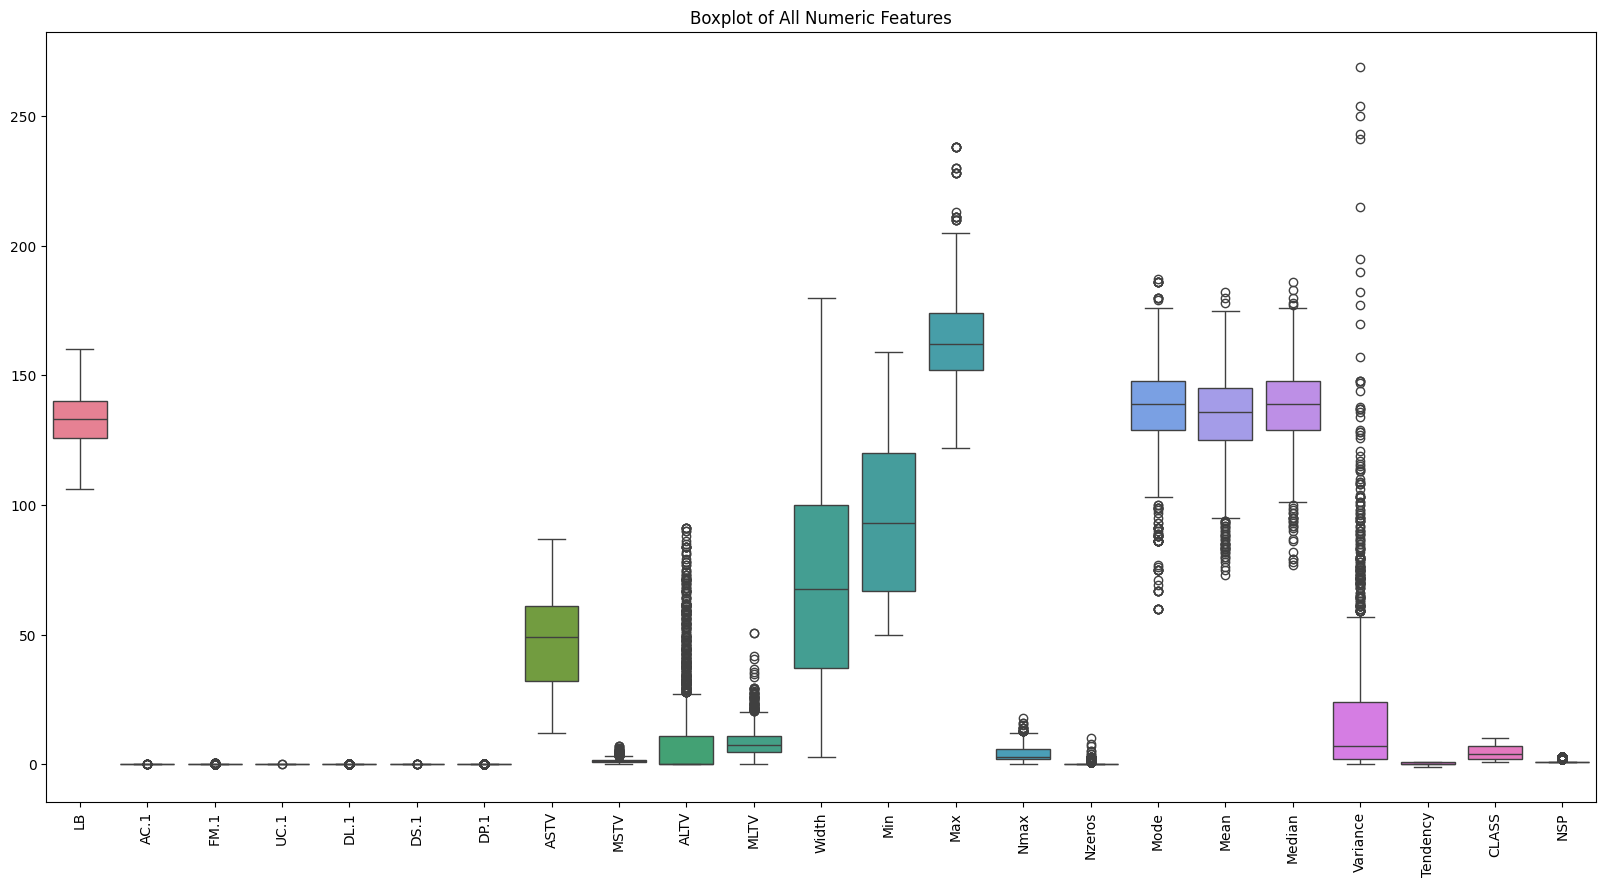

In [57]:
plt.figure(figsize=(20,10))
sns.boxplot(data=numeric_df)
plt.xticks(rotation=90)
plt.title('Boxplot of All Numeric Features')
plt.show()



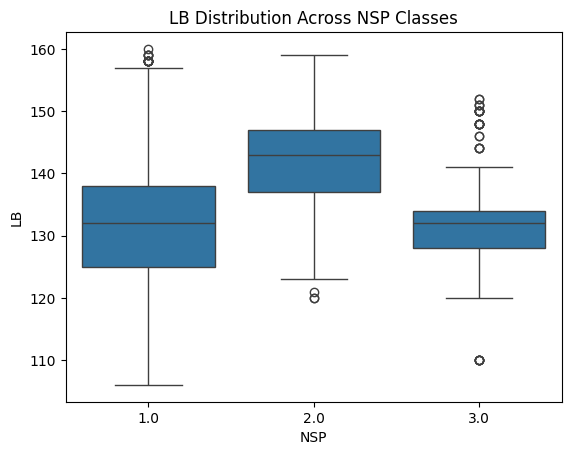

In [58]:
sns.boxplot(x='NSP', y='LB', data=df_new)
plt.title('LB Distribution Across NSP Classes')
plt.show()


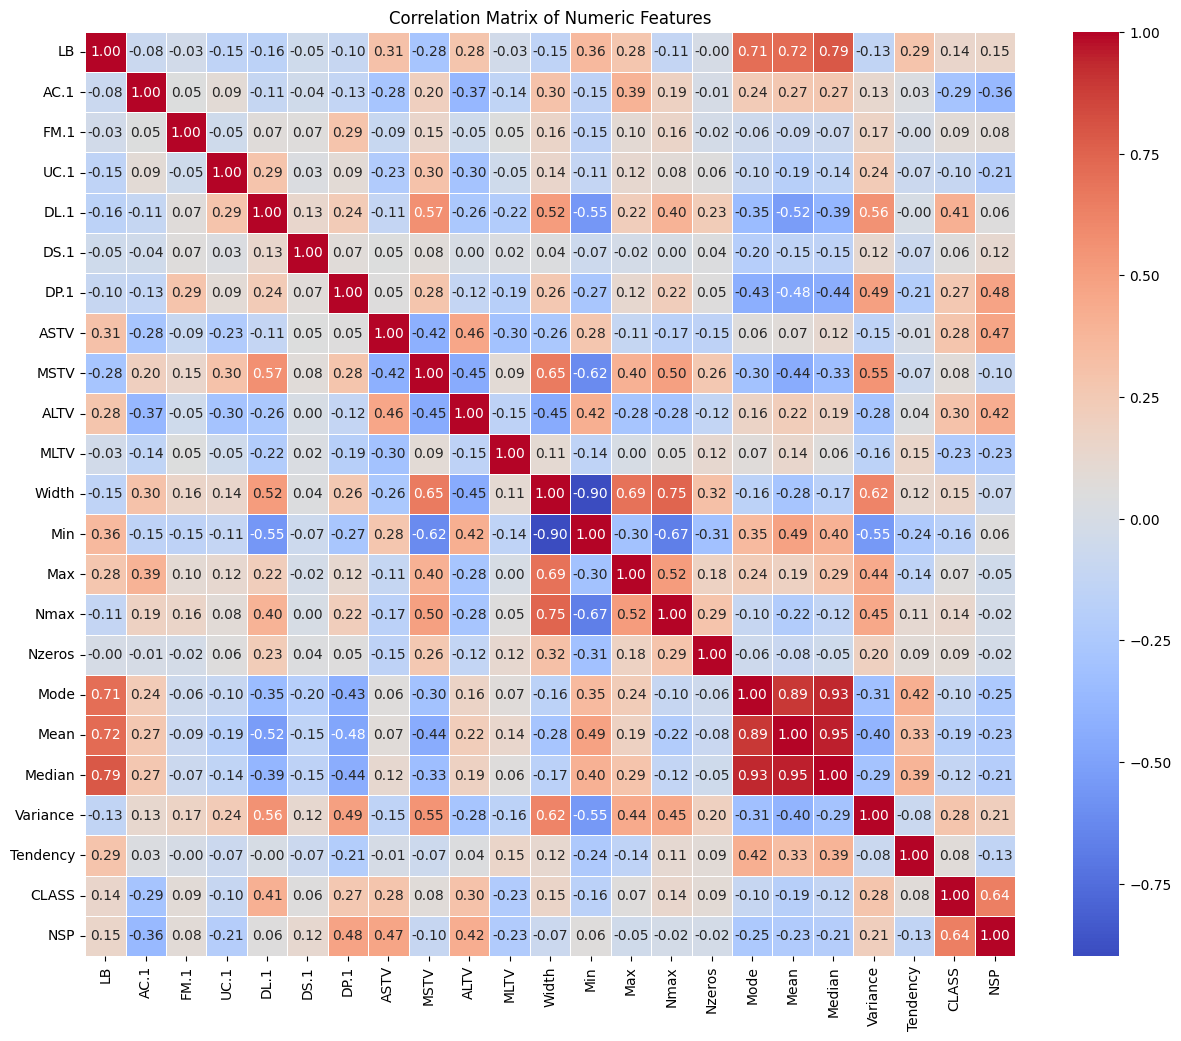

In [61]:


# Compute correlation matrix
corr_matrix = df_new.corr()

# Plot heatmap
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


<Axes: ylabel='count'>

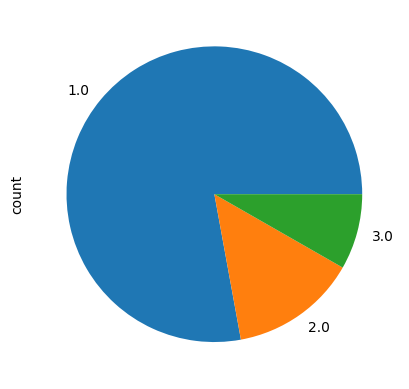

In [62]:
df_new['NSP'].value_counts().plot(kind='pie')

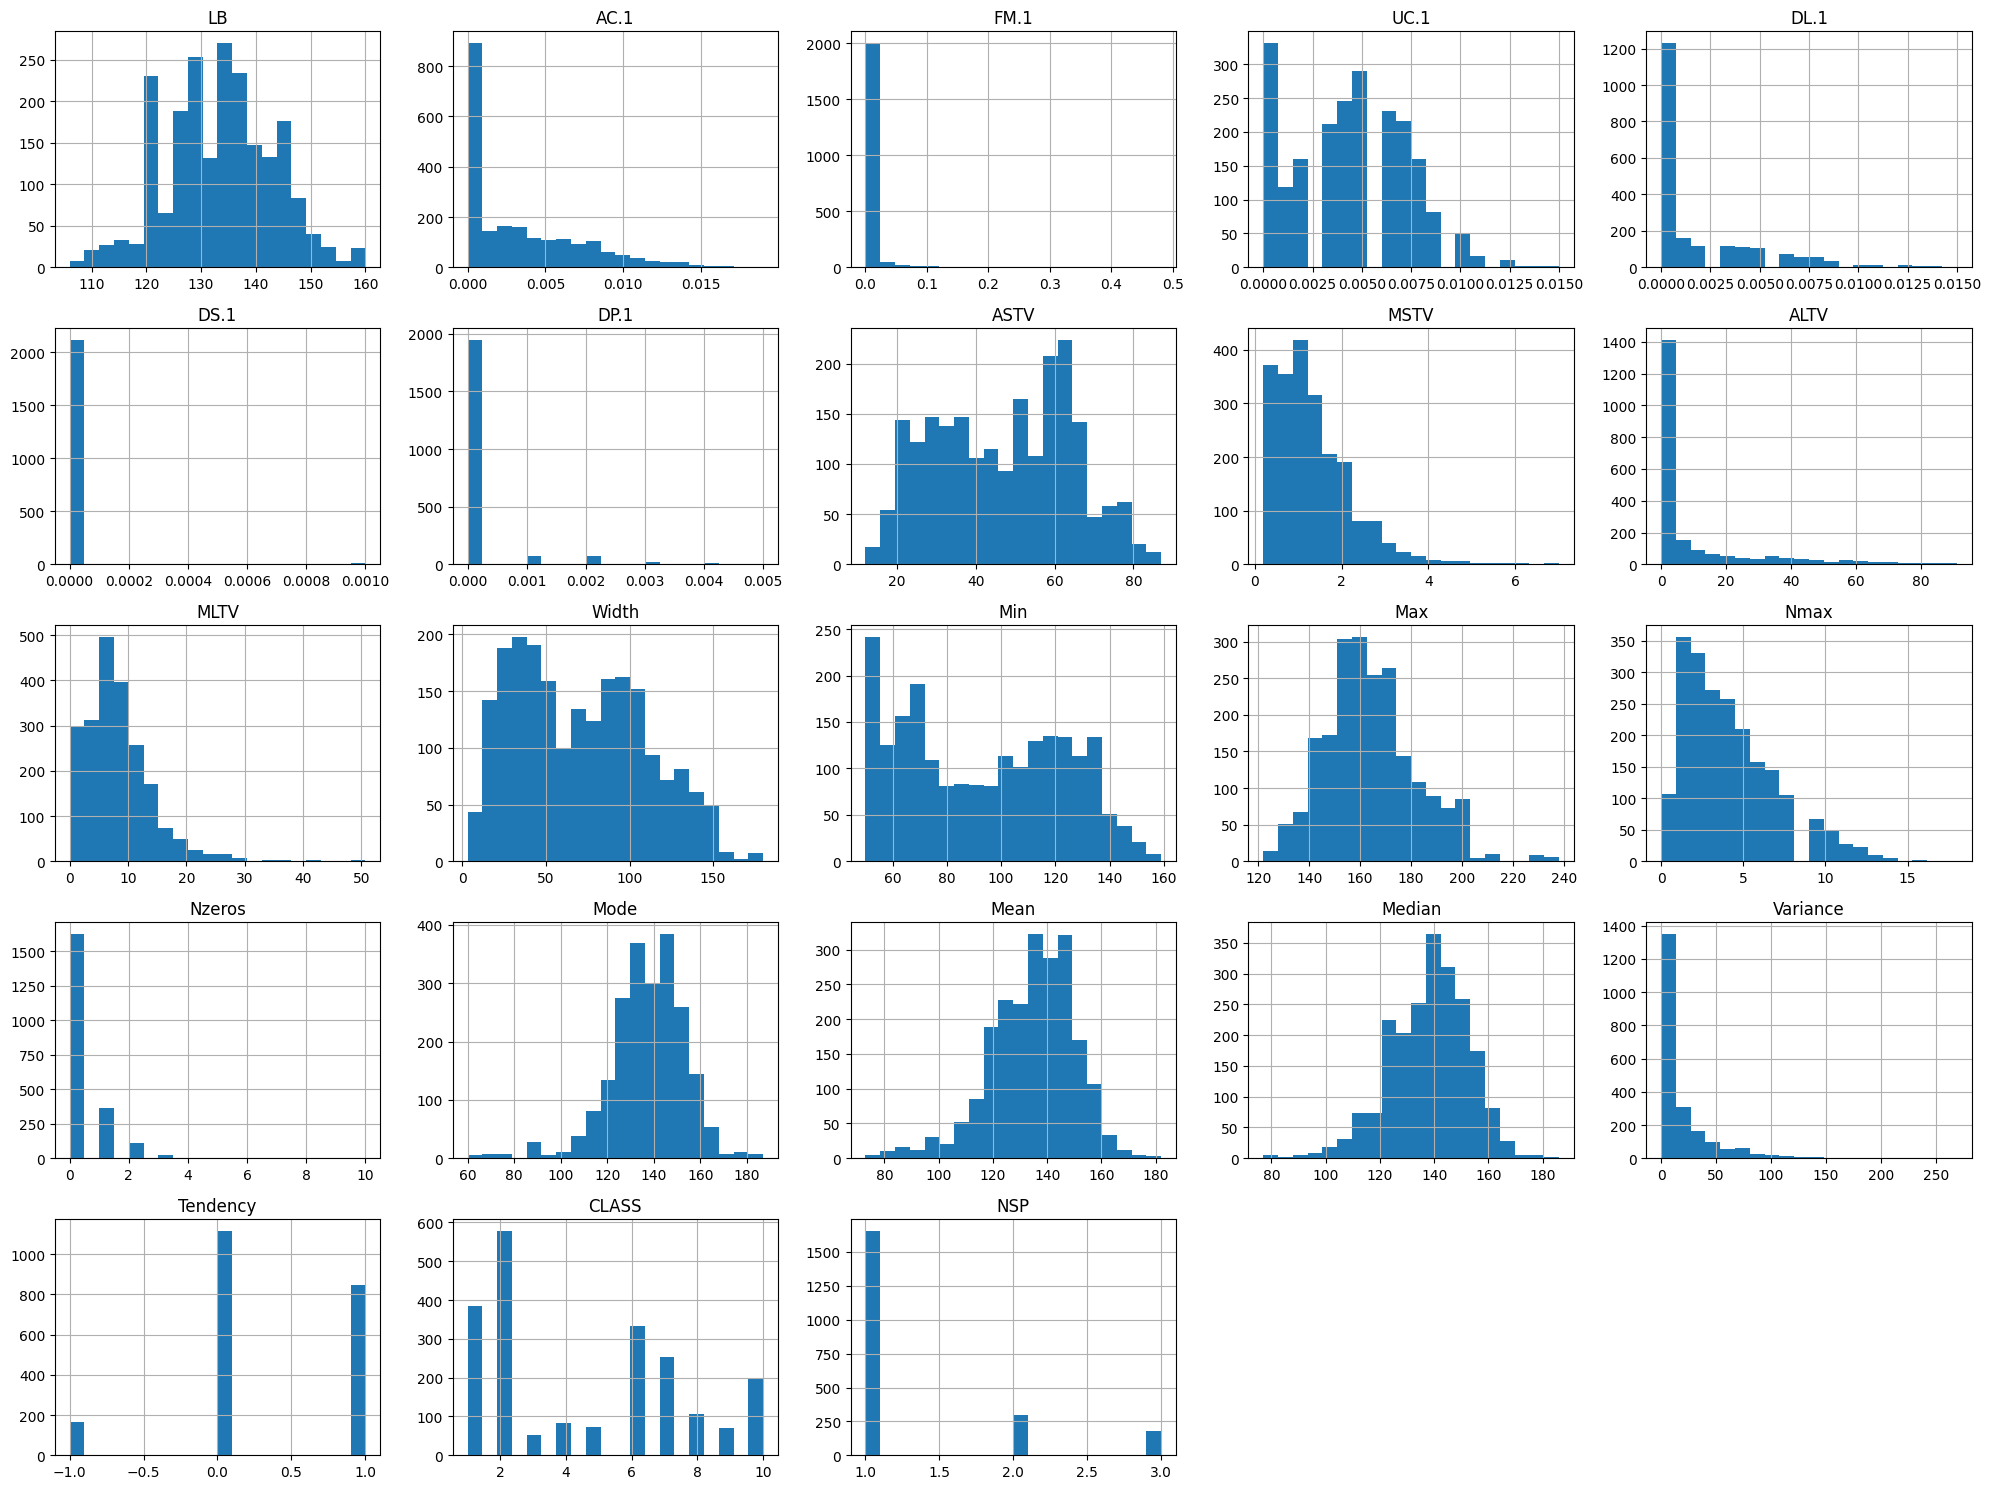

In [64]:


numeric_df = df_new.select_dtypes(include=['float64', 'int64'])

numeric_df.hist(figsize=(20,15), bins=20)
plt.tight_layout()
plt.show()


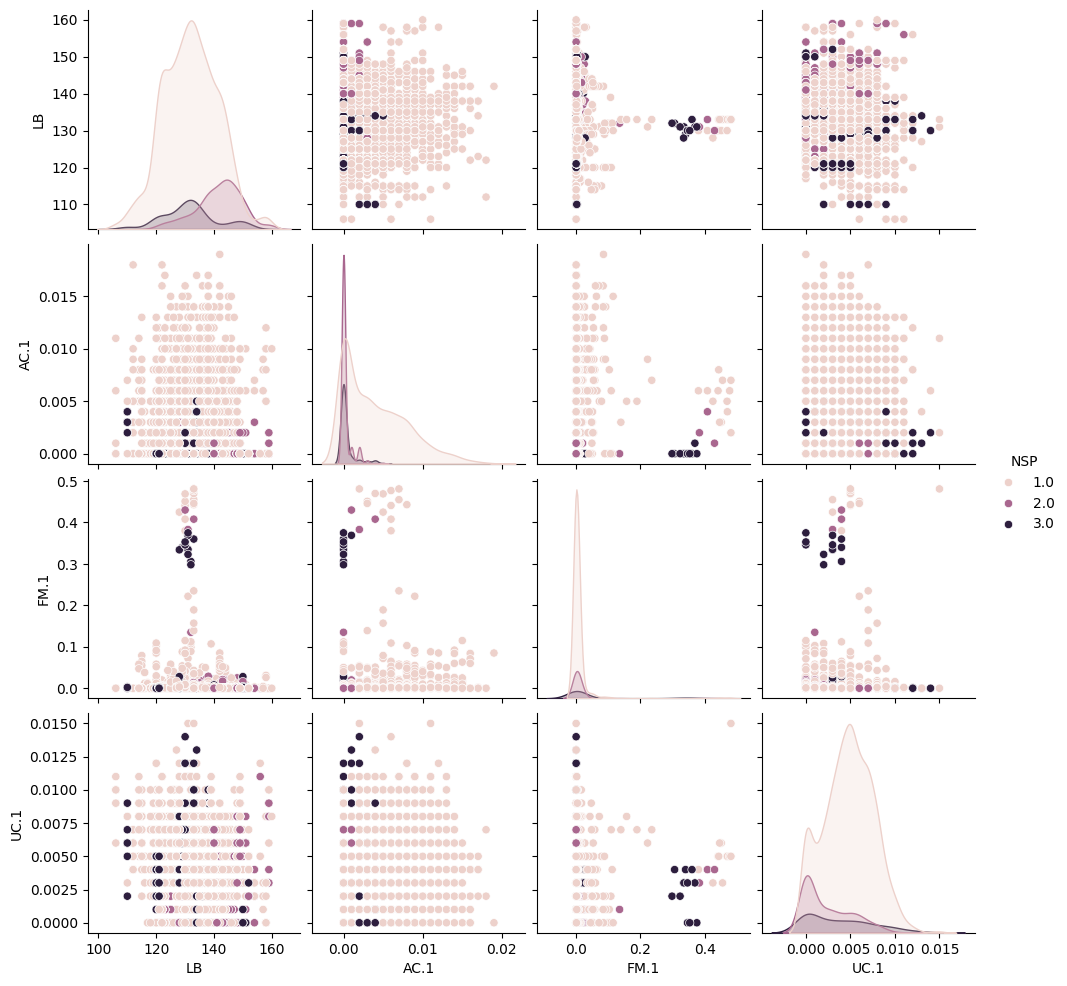

In [66]:
sns.pairplot(df_new, vars=['LB','AC.1','FM.1','UC.1'], hue='NSP')
plt.show()


In [67]:
corr_with_target = df_new.corr()['NSP'].sort_values(ascending=False)
print(corr_with_target)


NSP         1.000000
CLASS       0.643028
DP.1        0.475501
ASTV        0.469912
ALTV        0.423305
Variance    0.206854
LB          0.148147
DS.1        0.119658
FM.1        0.083749
Min         0.063178
DL.1        0.057849
Nzeros     -0.016356
Nmax       -0.023407
Max        -0.045178
Width      -0.068724
MSTV       -0.103786
Tendency   -0.131562
UC.1       -0.205012
Median     -0.205041
MLTV       -0.225443
Mean       -0.227007
Mode       -0.250433
AC.1       -0.363766
Name: NSP, dtype: float64


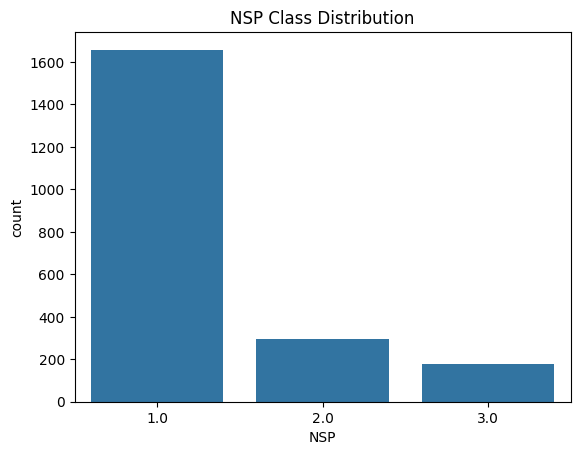

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='NSP', data=df_new)
plt.title('NSP Class Distribution')
plt.show()
